In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./dataset/분기추가.csv',encoding = 'cp949')

In [17]:
df1 = pd.read_csv('ex_cust.csv',encoding = 'utf-8-sig')
df_ex=df1[['Unnamed: 0']]
df_ex.columns=['고객번호']

In [4]:
df_cust=pd.read_csv('./dataset/PRODCL2.csv',encoding = 'utf8')
df_cust=df_cust[['소분류코드','상품분류','소비재분류']]

In [5]:
df_new=pd.merge(df, df_cust, how='left', left_on='소분류코드',right_on='소분류코드')
df_new

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
0,B,8919510,5,505,B050502,17485,48,20150921,21,2252,2015,월요일,9,7Q,식료품,편의품
1,B,8919510,5,510,B051005,17485,48,20150921,21,1408,2015,월요일,9,7Q,식료품,편의품
2,B,8919510,46,4603,B460304,17485,48,20150921,21,26793,2015,월요일,9,7Q,식료품,편의품
3,B,8919510,52,5210,B521004,17485,48,20150921,21,28831,2015,월요일,9,7Q,식료품,편의품
4,B,8919510,52,5214,B521402,17485,48,20150921,21,14416,2015,월요일,9,7Q,식료품,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,6937011,13,1305,B130502,18575,11,20151228,17,2735,2015,월요일,12,8Q,기호품,편의품
28593026,B,10561833,10,1003,B100305,15886,116,20150526,20,4847,2015,화요일,5,6Q,식료품,편의품
28593027,B,10561838,14,1402,B140201,11525,116,20150526,16,4504,2015,화요일,5,6Q,식료품,편의품
28593028,B,8233755,21,2108,B210802,9470,32,20150117,16,627,2015,토요일,1,5Q,생활잡화,편의품


In [19]:
# 데이터프레임 수정
def data_cat(df,y):
#     df = pd.read_csv(x,encoding = 'cp949')
#     df=df.reset_index()
    df_c=['고객번호']
    for i in range(1,9):
        t= y+str(i)
        df_c.append(t)
    df_main_n=pd.merge(df_ex,df, how='left', on='고객번호')
    df_main_n.columns=df_c
    df_main_n.fillna(0,inplace=True)
    return df_main_n

In [7]:
df_food = df_new[(df_new['상품분류']=='식료품')|(df_new['상품분류']=='식료품 ')]

In [8]:
df_clo = df_new[(df_new['상품분류']=='의류잡화')|(df_new['상품분류']=='웨딩')]

In [9]:
df_life = df_new[(df_new['상품분류']=='생활잡화')]

In [20]:
#다시구해
df_food_p_sum = pd.pivot_table(df_food,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_food_p_count = pd.pivot_table(df_food,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
df_food_sum=data_cat(df_food_p_sum,'식품_총구매액')
df_food_count=data_cat(df_food_p_count,'식품_총구매횟수')
df_food_all = pd.merge(df_food_sum,df_food_count,on='고객번호')
df_food_all

,고객번호,식품_총구매액1,식품_총구매액2,식품_총구매액3,식품_총구매액4,식품_총구매액5,식품_총구매액6,식품_총구매액7,식품_총구매액8,식품_총구매횟수1,식품_총구매횟수2,식품_총구매횟수3,식품_총구매횟수4,식품_총구매횟수5,식품_총구매횟수6,식품_총구매횟수7,식품_총구매횟수8
0,1,635666.0,995603.0,889163.0,1579134.0,1481879.0,1085088.0,570742.0,284778.0,62.0,56.0,70.0,123.0,97.0,89.0,26.0,38.0
1,2,2455558.0,2030956.0,1652569.0,1511411.0,1874481.0,965639.0,1319363.0,1149868.0,126.0,103.0,79.0,92.0,76.0,51.0,60.0,65.0
2,3,142184.0,316266.0,486706.0,191094.0,170284.0,198980.0,346174.0,183260.0,43.0,95.0,115.0,54.0,39.0,53.0,74.0,61.0
3,4,566579.0,893745.0,398993.0,288153.0,754249.0,730851.0,622233.0,396264.0,75.0,114.0,43.0,53.0,90.0,93.0,70.0,70.0
4,6,866206.0,911026.0,1261397.0,757688.0,1329527.0,543104.0,1617846.0,902038.0,137.0,115.0,108.0,122.0,181.0,111.0,160.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,368278.0,706254.0,278658.0,253050.0,663853.0,373618.0,93171.0,241632.0,69.0,126.0,58.0,79.0,104.0,60.0,16.0,58.0
18862,19334,719939.0,2365534.0,2542607.0,2088571.0,903687.0,548890.0,84599.0,73965.0,120.0,438.0,441.0,290.0,179.0,119.0,23.0,31.0
18863,19335,283067.0,843339.0,942253.0,848912.0,906083.0,740650.0,604432.0,474497.0,51.0,157.0,142.0,153.0,146.0,110.0,110.0,113.0
18864,19336,14761.0,41121.0,220109.0,24308.0,82526.0,2681.0,289438.0,62546.0,1.0,3.0,13.0,3.0,5.0,1.0,9.0,3.0


In [21]:
#다시구해
df_clo_p_sum = pd.pivot_table(df_clo,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_clo_p_count = pd.pivot_table(df_clo,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
df_clo_sum=data_cat(df_clo_p_sum,'의류_총구매액')
df_clo_count=data_cat(df_clo_p_count,'의류_총구매횟수')
df_clo_all = pd.merge(df_clo_sum,df_clo_count,on='고객번호')
df_clo_all

,고객번호,의류_총구매액1,의류_총구매액2,의류_총구매액3,의류_총구매액4,의류_총구매액5,의류_총구매액6,의류_총구매액7,의류_총구매액8,의류_총구매횟수1,의류_총구매횟수2,의류_총구매횟수3,의류_총구매횟수4,의류_총구매횟수5,의류_총구매횟수6,의류_총구매횟수7,의류_총구매횟수8
0,1,4813259.0,5975047.0,6635532.0,5584480.0,5735435.0,6914818.0,5930058.0,3016727.0,25.0,32.0,28.0,28.0,34.0,27.0,35.0,20.0
1,2,1917126.0,2751441.0,4834960.0,2176999.0,7456623.0,2046243.0,4899422.0,4696512.0,15.0,19.0,19.0,11.0,26.0,17.0,24.0,20.0
2,3,0.0,82407.0,0.0,0.0,0.0,0.0,0.0,6444.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4,574609.0,2601328.0,1194615.0,682933.0,659840.0,926929.0,1181191.0,612226.0,10.0,30.0,19.0,11.0,8.0,15.0,16.0,12.0
4,6,457586.0,1479824.0,1171496.0,734920.0,393014.0,1470931.0,1687090.0,1209693.0,4.0,27.0,20.0,16.0,10.0,23.0,19.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,42314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18862,19334,32473.0,29976.0,15252.0,112541.0,97798.0,62089.0,403190.0,0.0,3.0,3.0,3.0,10.0,5.0,8.0,2.0,0.0
18863,19335,106572.0,584164.0,400856.0,221088.0,316050.0,382290.0,50455.0,21317.0,5.0,19.0,19.0,9.0,12.0,14.0,3.0,2.0
18864,19336,380830.0,1739867.0,2304527.0,3320829.0,1467478.0,3344792.0,5198447.0,3350259.0,3.0,28.0,25.0,24.0,18.0,19.0,17.0,30.0


In [22]:
#다시구해
df_life_p_sum =  pd.pivot_table(df_life,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_life_p_count = pd.pivot_table(df_life,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
df_life_sum=data_cat(df_life_p_sum,'생활_총구매액')
df_life_count=data_cat(df_life_p_count,'생활_총구매횟수')
df_life_all = pd.merge(df_life_sum,df_life_count,on='고객번호')
df_life_all

,고객번호,생활_총구매액1,생활_총구매액2,생활_총구매액3,생활_총구매액4,생활_총구매액5,생활_총구매액6,생활_총구매액7,생활_총구매액8,생활_총구매횟수1,생활_총구매횟수2,생활_총구매횟수3,생활_총구매횟수4,생활_총구매횟수5,생활_총구매횟수6,생활_총구매횟수7,생활_총구매횟수8
0,1,491408.0,20859.0,3072186.0,787766.0,357221.0,182459.0,0.0,601055.0,7.0,3.0,17.0,28.0,18.0,6.0,0.0,6.0
1,2,806679.0,396282.0,3712799.0,146993.0,150287.0,2418332.0,881264.0,440004.0,9.0,15.0,13.0,12.0,9.0,24.0,16.0,13.0
2,3,588.0,23037.0,54219.0,54907.0,23696.0,32796.0,64039.0,4701.0,12.0,33.0,34.0,25.0,11.0,19.0,22.0,3.0
3,4,93210.0,68787.0,146490.0,99858.0,79369.0,55115.0,55005.0,77138.0,5.0,15.0,7.0,11.0,9.0,11.0,7.0,6.0
4,6,176503.0,211125.0,335845.0,190732.0,176711.0,50776.0,278276.0,57134.0,23.0,29.0,32.0,26.0,29.0,14.0,31.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,5806.0,1545.0,1130.0,1871.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0
18862,19334,36064.0,182670.0,95343.0,115215.0,59246.0,118170.0,1576.0,24125.0,5.0,30.0,20.0,28.0,21.0,28.0,4.0,7.0
18863,19335,222089.0,669206.0,688042.0,177811.0,195957.0,273871.0,310658.0,74823.0,16.0,64.0,58.0,34.0,36.0,43.0,35.0,18.0
18864,19336,0.0,753302.0,42820.0,79815.0,243909.0,0.0,234030.0,0.0,0.0,4.0,1.0,2.0,5.0,0.0,2.0,0.0


In [23]:
df_food_all.to_csv('./dataset/MainCategory/식료품_원본.csv',encoding='cp949')
df_clo_all.to_csv('./dataset/MainCategory/의류잡화_원본.csv',encoding='cp949')
df_life_all.to_csv('./dataset/MainCategory/생활잡화_원본.csv',encoding='cp949')

In [31]:
def graph(df):
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)
    x=df.iloc[:,1]
    y=df.iloc[:,9]
    ax1.hist(x,10)
    ax2.hist(y,10)
    ax3.scatter(x,y)

,고객번호,식품_총구매액1,식품_총구매액2,식품_총구매액3,식품_총구매액4,식품_총구매액5,식품_총구매액6,식품_총구매액7,식품_총구매액8,식품_총구매횟수1,식품_총구매횟수2,식품_총구매횟수3,식품_총구매횟수4,식품_총구매횟수5,식품_총구매횟수6,식품_총구매횟수7,식품_총구매횟수8
count,18866.000000,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,9.050594e+05,9.330506e+05,1.113237e+06,7.565203e+05,9.762017e+05,9.278994e+05,1.111251e+06,6.689112e+05,120.843740,128.842150,131.961253,129.817608,133.566416,141.065780,139.002226,123.524648
std,5556.931811,5.540762e+06,7.464135e+06,5.838836e+06,2.035311e+06,2.471780e+06,1.581695e+06,2.064801e+06,1.721241e+06,92.890173,96.830399,97.109385,93.266960,94.630601,102.968163,102.730408,93.670664
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,3.758365e+05,4.122102e+05,4.888498e+05,3.790020e+05,4.611720e+05,4.735778e+05,5.077005e+05,3.184868e+05,47.000000,52.000000,55.000000,56.000000,57.000000,58.000000,56.000000,49.000000
50%,9537.500000,6.590405e+05,6.956670e+05,8.222450e+05,6.245080e+05,7.598380e+05,7.914445e+05,8.690610e+05,5.524400e+05,102.000000,110.000000,113.000000,112.000000,117.000000,121.000000,119.000000,103.000000
75%,14358.750000,1.016199e+06,1.039966e+06,1.246746e+06,9.248635e+05,1.142055e+06,1.177470e+06,1.323987e+06,8.305110e+05,175.000000,185.000000,188.000000,184.000000,192.000000,202.000000,202.000000,178.000000
max,19337.000000,5.406609e+08,8.602259e+08,6.894860e+08,1.520858e+08,1.668981e+08,1.358508e+08,1.099536e+08,1.380921e+08,1094.000000,1336.000000,1426.000000,1400.000000,1245.000000,1278.000000,1153.000000,1213.000000


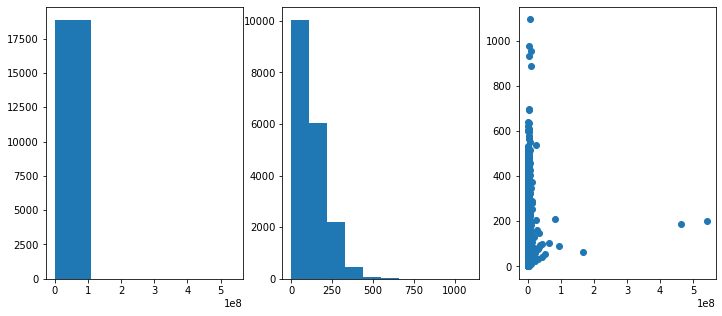

In [29]:
display(df_food_all.describe())
graph(df_food_all)

,고객번호,식품_총구매액1,식품_총구매액2,식품_총구매액3,식품_총구매액4,식품_총구매액5,식품_총구매액6,식품_총구매액7,식품_총구매액8,식품_총구매횟수1,식품_총구매횟수2,식품_총구매횟수3,식품_총구매횟수4,식품_총구매횟수5,식품_총구매횟수6,식품_총구매횟수7,식품_총구매횟수8
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,13.198624,13.269696,13.467212,13.194007,13.411493,13.416645,13.513965,13.013316,4.425667,4.508818,4.547571,4.552665,4.583337,4.617139,4.587699,4.459438
std,5556.931811,1.299516,1.151561,1.179971,1.028104,1.060169,1.067679,1.136246,1.252024,1.016318,0.982002,0.960922,0.921409,0.919627,0.952015,0.980424,0.999452
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,12.836912,12.929291,13.099813,12.845299,13.041529,13.068073,13.137649,12.671339,3.871201,3.970292,4.025352,4.043051,4.060443,4.077537,4.043051,3.912023
50%,9537.500000,13.398542,13.452628,13.619795,13.344721,13.540862,13.581616,13.675170,13.222102,4.634729,4.709530,4.736198,4.727388,4.770685,4.804021,4.787492,4.644391
75%,14358.750000,13.831581,13.854700,14.036048,13.737403,13.948341,13.978879,14.096159,13.629798,5.170484,5.225747,5.241747,5.220356,5.262690,5.313206,5.313206,5.187386
max,19337.000000,20.108303,20.572706,20.351457,18.839955,18.932894,18.727068,18.515569,18.743431,6.998510,7.198184,7.263330,7.244942,7.127694,7.153834,7.050989,7.101676


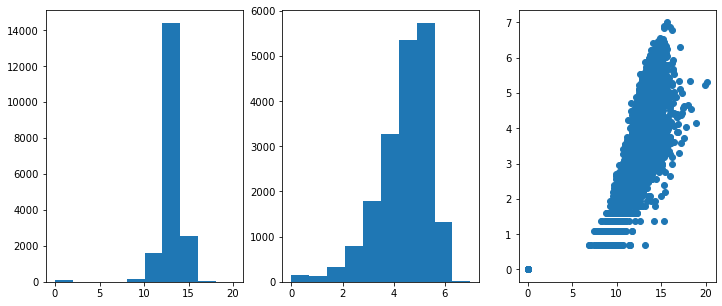

In [32]:
df_food_log=df_food_all.copy()
df_food_log.iloc[:,1:]=df_food_log.iloc[:,1:].apply(lambda x:np.log1p(x))
display(df_food_log.describe())
graph(df_food_log)

,고객번호,의류_총구매액1,의류_총구매액2,의류_총구매액3,의류_총구매액4,의류_총구매액5,의류_총구매액6,의류_총구매액7,의류_총구매액8,의류_총구매횟수1,의류_총구매횟수2,의류_총구매횟수3,의류_총구매횟수4,의류_총구매횟수5,의류_총구매횟수6,의류_총구매횟수7,의류_총구매횟수8
count,18866.000000,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,1.578492e+06,1.677516e+06,1.501324e+06,1.988204e+06,1.700245e+06,1.791436e+06,1.516671e+06,1.793915e+06,10.721086,13.846496,11.680801,13.156260,10.915880,13.681597,11.520248,12.445828
std,5556.931811,4.973870e+06,4.361041e+06,4.149327e+06,1.100364e+07,5.949338e+06,7.330658e+06,7.259122e+06,8.756695e+06,11.240617,14.397373,11.984710,13.241257,11.502349,14.081016,12.100272,13.240760
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,6.061750e+04,7.779750e+04,7.264700e+04,8.921625e+04,6.543500e+04,8.281100e+04,6.736275e+04,7.270900e+04,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,9537.500000,3.739900e+05,4.268975e+05,3.885415e+05,4.766745e+05,3.865390e+05,4.463075e+05,3.683330e+05,3.999820e+05,7.000000,9.000000,8.000000,9.000000,7.000000,9.000000,8.000000,8.000000
75%,14358.750000,1.578037e+06,1.867661e+06,1.596326e+06,1.961377e+06,1.673188e+06,1.902305e+06,1.492262e+06,1.721242e+06,16.000000,20.000000,17.000000,19.000000,16.000000,20.000000,17.000000,18.000000
max,19337.000000,4.442858e+08,2.958303e+08,2.817359e+08,1.151111e+09,4.013009e+08,6.902813e+08,6.903261e+08,7.118691e+08,137.000000,200.000000,137.000000,168.000000,122.000000,147.000000,195.000000,181.000000


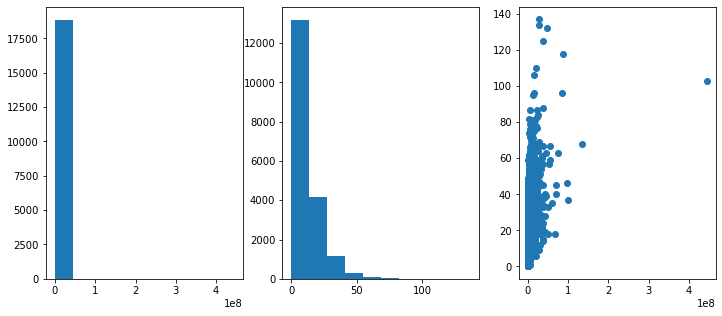

In [33]:
display(df_clo_all.describe())
graph(df_clo_all)

,고객번호,의류_총구매액1,의류_총구매액2,의류_총구매액3,의류_총구매액4,의류_총구매액5,의류_총구매액6,의류_총구매액7,의류_총구매액8,의류_총구매횟수1,의류_총구매횟수2,의류_총구매횟수3,의류_총구매횟수4,의류_총구매횟수5,의류_총구매횟수6,의류_총구매횟수7,의류_총구매횟수8
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,11.551345,11.856791,11.718878,12.087355,11.670649,11.931034,11.631822,11.803525,1.980253,2.180136,2.061362,2.182227,1.995845,2.181229,2.043041,2.101897
std,5556.931811,4.455969,4.224901,4.257137,4.016052,4.372673,4.179072,4.314429,4.233236,1.067252,1.122427,1.069735,1.063284,1.064321,1.108361,1.073161,1.086708
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,11.012355,11.261877,11.193381,11.398830,11.088828,11.324328,11.117862,11.194234,1.098612,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294
50%,9537.500000,12.831987,12.964302,12.870158,13.074591,12.864991,13.008766,12.816745,12.899177,2.079442,2.302585,2.197225,2.302585,2.079442,2.302585,2.197225,2.197225
75%,14358.750000,14.271693,14.440198,14.283216,14.489158,14.330242,14.458578,14.215805,14.358557,2.833213,3.044522,2.890372,2.995732,2.833213,3.044522,2.890372,2.944439
max,19337.000000,19.911979,19.505297,19.456481,20.863994,19.810222,20.352610,20.352675,20.383405,4.927254,5.303305,4.927254,5.129899,4.812184,4.997212,5.278115,5.204007


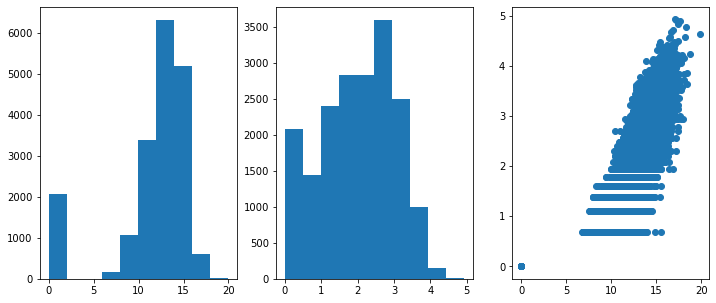

In [34]:
df_clo_log=df_clo_all.copy()
df_clo_log.iloc[:,1:]=df_clo_log.iloc[:,1:].apply(lambda x:np.log1p(x))
display(df_clo_log.describe())
graph(df_clo_log)

,고객번호,생활_총구매액1,생활_총구매액2,생활_총구매액3,생활_총구매액4,생활_총구매액5,생활_총구매액6,생활_총구매액7,생활_총구매액8,생활_총구매횟수1,생활_총구매횟수2,생활_총구매횟수3,생활_총구매횟수4,생활_총구매횟수5,생활_총구매횟수6,생활_총구매횟수7,생활_총구매횟수8
count,18866.000000,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,2.131724e+05,2.137665e+05,2.510721e+05,1.888789e+05,2.242100e+05,2.297137e+05,2.477398e+05,1.939362e+05,16.486908,17.541026,19.071186,18.143963,17.992420,18.708735,19.343422,17.663151
std,5556.931811,1.977162e+06,9.326173e+05,1.234123e+06,4.108813e+05,1.247593e+06,6.929056e+05,9.033231e+05,2.050766e+06,14.622529,15.304297,16.040456,15.229888,15.140585,16.056963,16.616933,15.486797
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,5.033400e+04,5.866750e+04,7.211875e+04,5.631225e+04,6.058925e+04,6.494775e+04,7.114525e+04,4.640200e+04,6.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000
50%,9537.500000,1.065900e+05,1.164355e+05,1.434850e+05,1.079555e+05,1.217920e+05,1.291475e+05,1.427580e+05,9.632850e+04,13.000000,14.000000,15.000000,14.000000,14.000000,15.000000,15.000000,14.000000
75%,14358.750000,1.997638e+05,2.180940e+05,2.614350e+05,1.979222e+05,2.246562e+05,2.416512e+05,2.587335e+05,1.815650e+05,23.000000,24.000000,26.000000,25.000000,25.000000,26.000000,27.000000,24.000000
max,19337.000000,2.388975e+08,8.334325e+07,1.443809e+08,1.929348e+07,1.519866e+08,6.554037e+07,7.921201e+07,2.756396e+08,263.000000,262.000000,201.000000,212.000000,168.000000,332.000000,309.000000,330.000000


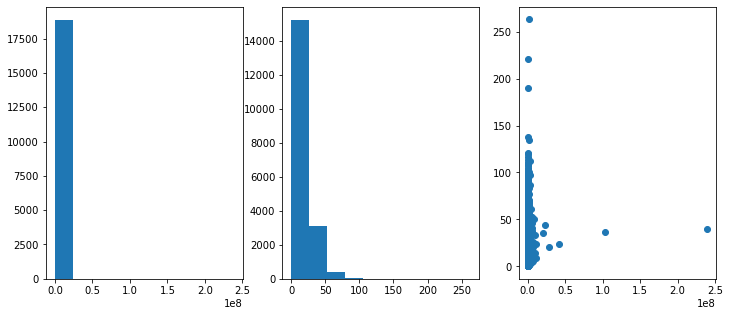

In [35]:
display(df_life_all.describe())
graph(df_life_all)

,고객번호,생활_총구매액1,생활_총구매액2,생활_총구매액3,생활_총구매액4,생활_총구매액5,생활_총구매액6,생활_총구매액7,생활_총구매액8,생활_총구매횟수1,생활_총구매횟수2,생활_총구매횟수3,생활_총구매횟수4,생활_총구매횟수5,생활_총구매횟수6,생활_총구매횟수7,생활_총구매횟수8
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,11.143879,11.331346,11.564132,11.330723,11.425083,11.520998,11.557805,11.161044,2.496607,2.575055,2.662051,2.629674,2.614427,2.649983,2.668598,2.581401
std,5556.931811,2.377243,2.137424,2.038696,1.946354,1.994510,1.904904,2.024648,2.093277,0.938543,0.905597,0.901192,0.873028,0.884871,0.882568,0.908038,0.905029
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,10.826456,10.979658,11.186083,10.938685,11.011889,11.081354,11.172493,10.745119,1.945910,2.079442,2.197225,2.079442,2.079442,2.079442,2.079442,2.079442
50%,9537.500000,11.576754,11.665101,11.873993,11.589484,11.710078,11.768718,11.868913,11.475530,2.639057,2.708050,2.772589,2.708050,2.708050,2.772589,2.772589,2.708050
75%,14358.750000,12.204896,12.292686,12.473945,12.195635,12.322331,12.395255,12.463558,12.109374,3.178054,3.218876,3.295837,3.258097,3.258097,3.295837,3.332205,3.218876
max,19337.000000,19.291545,18.238478,18.787966,16.775278,18.839303,17.998177,18.187639,19.434605,5.575949,5.572154,5.308268,5.361292,5.129899,5.808142,5.736572,5.802118


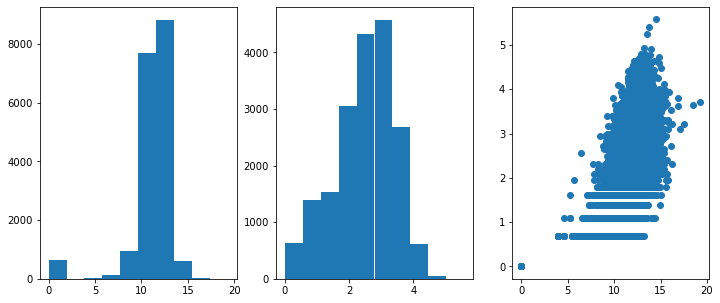

In [36]:
df_life_log=df_life_all.copy()
df_life_log.iloc[:,1:]=df_life_log.iloc[:,1:].apply(lambda x:np.log1p(x))
display(df_life_log.describe())
graph(df_life_log)

In [37]:
def hist_cat(x):
    if x == 0:
        return 0
    elif x>0 and x <= bins[1]:
        return 1
    elif( x > bins[1]) and (x <= bins[2]) :
        return 2
    elif( x > bins[2]) and (x <=bins[3]) :
        return 3    
    elif( x > bins[3]) and (x <=bins[4]) :
        return 4
#     elif( x > bins[4]) :
#         return 4    
    elif( x > bins[4]) and (x <=bins[5]) :
        return 5    
    elif( x > bins[5]) and (x <=bins[6]) :
        return 6    
    elif( x > bins[6]) and (x <=bins[7]) :
        return 7    
    elif( x > bins[7]) and (x <=bins[8]) :
        return 8    
    elif( x > bins[8]) and (x <=bins[9]) :
        return 9  
    elif( x > bins[9]):
        return 10    

In [38]:
def tr(df):
    df_col=df.columns[1:]

    asa = df.iloc[:,1:-1].describe()
    des_25 = (asa.loc['25%'].sum())/7
    des_50 = (asa.loc['50%'].sum())/7
    des_75 = (asa.loc['75%'].sum())/7

    #등급나누기
    def cat_sales(x):
        if x == 0:
            return 0
        elif (x > 0) and (x <=des_25):
            return 1
        elif (x > des_25) and (x <=des_50):
            return 2
        elif (x > des_50) and (x <=des_75):
            return 3
        elif (x > des_75):
            return 4
    for a in df_col:
        df[a]=df[a].apply(lambda x : cat_sales(x))
    return df

In [45]:
df_food_log2 = df_food_log[df_food_log.columns[:9]]
df_food_log2=tr(df_food_log2)
display(df_food_log2)
for i in range(1,8):
    display(df_food_log2.iloc[:,i].value_counts())

,고객번호,식품_총구매액1,식품_총구매액2,식품_총구매액3,식품_총구매액4,식품_총구매액5,식품_총구매액6,식품_총구매액7,식품_총구매액8
0,1,2,3,3,4,4,3,2,1
1,2,4,4,4,4,4,3,4,4
2,3,1,1,2,1,1,1,1,1
3,4,2,3,1,1,3,2,2,1
4,6,3,3,4,3,4,2,4,3
...,...,...,...,...,...,...,...,...,...
18861,19333,1,2,1,1,2,1,1,1
18862,19334,2,4,4,4,3,2,1,1
18863,19335,1,3,3,3,3,2,2,2
18864,19336,1,1,1,1,1,1,1,1


In [48]:
df_clo_log2 = df_clo_log[df_clo_log.columns[:9]]
df_clo_log2=tr(df_clo_log2)
display(df_clo_log2)
for i in range(1,8):
    display(df_clo_log2.iloc[:,i].value_counts())

,고객번호,의류_총구매액1,의류_총구매액2,의류_총구매액3,의류_총구매액4,의류_총구매액5,의류_총구매액6,의류_총구매액7,의류_총구매액8
0,1,4,4,4,4,4,4,4,4
1,2,4,4,4,4,4,4,4,4
2,3,0,2,0,0,0,0,0,1
3,4,3,4,3,3,3,3,3,3
4,6,3,3,3,3,2,3,3,3
...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,0,0,0,0,0,0
18862,19334,1,1,1,2,2,1,2,0
18863,19335,2,3,2,2,2,2,1,1
18864,19336,2,4,4,4,3,4,4,4


2    4693
3    4675
4    4456
1    2960
0    2082
Name: 의류_총구매액1, dtype: int64

4    4990
2    4684
3    4589
1    2839
0    1764
Name: 의류_총구매액2, dtype: int64

2    4867
3    4797
4    4475
1    2876
0    1851
Name: 의류_총구매액3, dtype: int64

4    5176
3    4744
2    4622
1    2818
0    1506
Name: 의류_총구매액4, dtype: int64

2    4671
4    4646
3    4617
1    2973
0    1959
Name: 의류_총구매액5, dtype: int64

4    5021
3    4720
2    4647
1    2773
0    1705
Name: 의류_총구매액6, dtype: int64

2    4892
3    4815
4    4280
1    2943
0    1936
Name: 의류_총구매액7, dtype: int64

In [49]:
df_life_log2 = df_life_log[df_life_log.columns[:9]]
df_life_log2=tr(df_life_log2)
display(df_life_log2)
for i in range(1,8):
    display(df_life_log2.iloc[:,i].value_counts())

,고객번호,생활_총구매액1,생활_총구매액2,생활_총구매액3,생활_총구매액4,생활_총구매액5,생활_총구매액6,생활_총구매액7,생활_총구매액8
0,1,4,1,4,4,4,3,0,4
1,2,4,4,4,3,3,4,4,4
2,3,1,1,1,1,1,1,2,1
3,4,2,2,3,2,2,1,1,2
4,6,3,3,4,3,3,1,4,1
...,...,...,...,...,...,...,...,...,...
18861,19333,1,1,1,1,0,0,0,0
18862,19334,1,3,2,2,1,2,1,1
18863,19335,3,4,4,3,3,4,4,2
18864,19336,0,4,1,2,4,0,4,0


1    5071
2    4871
3    4370
4    3930
0     624
Name: 생활_총구매액1, dtype: int64

2    4910
3    4570
1    4497
4    4424
0     465
Name: 생활_총구매액2, dtype: int64

4    5693
3    5018
2    4177
1    3576
0     402
Name: 생활_총구매액3, dtype: int64

2    5334
1    4838
3    4461
4    3864
0     369
Name: 생활_총구매액4, dtype: int64

2    4720
3    4713
4    4628
1    4424
0     381
Name: 생활_총구매액5, dtype: int64

4    5124
3    4664
2    4630
1    4118
0     330
Name: 생활_총구매액6, dtype: int64

4    5657
3    4896
2    4265
1    3657
0     391
Name: 생활_총구매액7, dtype: int64

In [60]:
def updown(df,text):
    for k in df.index:
        sum = 0
        for i in range(1,7):
            sum += df.iloc[k,i+1] - df.iloc[k,i]
        df.loc[k,text+'_증감율'] = sum
    return df

In [63]:
def updown_abs(df,text):
    for k in df.index:
        sum = 0
        for i in range(1,7):
            a = df.iloc[k,i+1] - df.iloc[k,i]
            sum += abs(a)
        df.loc[k,text+'_변동율'] = sum
    return df

In [66]:
df_life_ud = updown(df_life_log2,'생활')
df_life_ud=updown_abs(df_life_ud,'생활')
df_life_ud.head()

,고객번호,생활_총구매액1,생활_총구매액2,생활_총구매액3,생활_총구매액4,생활_총구매액5,생활_총구매액6,생활_총구매액7,생활_총구매액8,생활_증감율,생활_변동율
0,1,4,1,4,4,4,3,0,4,-4.0,10.0
1,2,4,4,4,3,3,4,4,4,0.0,2.0
2,3,1,1,1,1,1,1,2,1,1.0,1.0
3,4,2,2,3,2,2,1,1,2,-1.0,3.0
4,6,3,3,4,3,3,1,4,1,1.0,7.0


In [69]:
df_life_ud['생활_(증감*0.8)+(변동*0.2)'] = (df_life_ud['생활_증감율']*0.8) + (df_life_ud['생활_변동율']*0.2)
df_life_ud.head()

,고객번호,생활_총구매액1,생활_총구매액2,생활_총구매액3,생활_총구매액4,생활_총구매액5,생활_총구매액6,생활_총구매액7,생활_총구매액8,생활_증감율,생활_변동율,생활_(증감*0.8)+(변동*0.2)
0,1,4,1,4,4,4,3,0,4,-4.0,10.0,-1.2
1,2,4,4,4,3,3,4,4,4,0.0,2.0,0.4
2,3,1,1,1,1,1,1,2,1,1.0,1.0,1.0
3,4,2,2,3,2,2,1,1,2,-1.0,3.0,-0.2
4,6,3,3,4,3,3,1,4,1,1.0,7.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,1,1,1,0,0,0,0,-1.0,1.0,-0.6
18862,19334,1,3,2,2,1,2,1,1,0.0,6.0,1.2
18863,19335,3,4,4,3,3,4,4,2,1.0,3.0,1.4
18864,19336,0,4,1,2,4,0,4,0,4.0,18.0,6.8


In [67]:
df_clo_ud = updown(df_clo_log2,'의류')
df_clo_ud=updown_abs(df_clo_ud,'의류')
df_clo_ud.head()

,고객번호,의류_총구매액1,의류_총구매액2,의류_총구매액3,의류_총구매액4,의류_총구매액5,의류_총구매액6,의류_총구매액7,의류_총구매액8,의류_증감율,의류_변동율
0,1,4,4,4,4,4,4,4,4,0.0,0.0
1,2,4,4,4,4,4,4,4,4,0.0,0.0
2,3,0,2,0,0,0,0,0,1,0.0,4.0
3,4,3,4,3,3,3,3,3,3,0.0,2.0
4,6,3,3,3,3,2,3,3,3,0.0,2.0


In [72]:
df_clo_ud['의류_(증감*0.8)+(변동*0.2)'] = (df_clo_ud['의류_증감율']*0.8) + (df_clo_ud['의류_변동율']*0.2)
df_clo_ud.head()

,고객번호,의류_총구매액1,의류_총구매액2,의류_총구매액3,의류_총구매액4,의류_총구매액5,의류_총구매액6,의류_총구매액7,의류_총구매액8,의류_증감율,의류_변동율,의류_(증감*0.8)+(변동*0.2)
0,1,4,4,4,4,4,4,4,4,0.0,0.0,0.0
1,2,4,4,4,4,4,4,4,4,0.0,0.0,0.0
2,3,0,2,0,0,0,0,0,1,0.0,4.0,0.8
3,4,3,4,3,3,3,3,3,3,0.0,2.0,0.4
4,6,3,3,3,3,2,3,3,3,0.0,2.0,0.4


In [68]:
df_food_ud = updown(df_food_log2,'식품')
df_food_ud=updown_abs(df_food_ud,'식품')
df_food_ud.head()

,고객번호,식품_총구매액1,식품_총구매액2,식품_총구매액3,식품_총구매액4,식품_총구매액5,식품_총구매액6,식품_총구매액7,식품_총구매액8,식품_증감율,식품_변동율
0,1,2,3,3,4,4,3,2,1,0.0,4.0
1,2,4,4,4,4,4,3,4,4,0.0,2.0
2,3,1,1,2,1,1,1,1,1,0.0,2.0
3,4,2,3,1,1,3,2,2,1,0.0,6.0
4,6,3,3,4,3,4,2,4,3,1.0,7.0


In [73]:
df_food_ud['식품_(증감*0.8)+(변동*0.2)'] = (df_food_ud['식품_증감율']*0.8) + (df_food_ud['식품_변동율']*0.2)
df_food_ud.head()

,고객번호,식품_총구매액1,식품_총구매액2,식품_총구매액3,식품_총구매액4,식품_총구매액5,식품_총구매액6,식품_총구매액7,식품_총구매액8,식품_증감율,식품_변동율,식품_(증감*0.8)+(변동*0.2)
0,1,2,3,3,4,4,3,2,1,0.0,4.0,0.8
1,2,4,4,4,4,4,3,4,4,0.0,2.0,0.4
2,3,1,1,2,1,1,1,1,1,0.0,2.0,0.4
3,4,2,3,1,1,3,2,2,1,0.0,6.0,1.2
4,6,3,3,4,3,4,2,4,3,1.0,7.0,2.2


In [75]:
df_food_CV=df_food_ud[['고객번호','식품_증감율','식품_변동율','식품_(증감*0.8)+(변동*0.2)']]
df_clo_CV=df_clo_ud[['고객번호','의류_증감율','의류_변동율','의류_(증감*0.8)+(변동*0.2)']]
df_life_CV=df_life_ud[['고객번호','생활_증감율','생활_변동율','생활_(증감*0.8)+(변동*0.2)']]

In [78]:
df_food_CV

,고객번호,식품_증감율,식품_변동율,식품_(증감*0.8)+(변동*0.2)
0,1,0.0,4.0,0.8
1,2,0.0,2.0,0.4
2,3,0.0,2.0,0.4
3,4,0.0,6.0,1.2
4,6,1.0,7.0,2.2
...,...,...,...,...
18861,19333,0.0,4.0,0.8
18862,19334,-1.0,5.0,0.2
18863,19335,1.0,3.0,1.4
18864,19336,0.0,0.0,0.0


In [79]:
def auto(df,df1,text):
    
    def add_CV(df,text):
        for i in df.index:
            m=df.iloc[i,1:].mean()
            if m == 0:
                cv=0
            elif m != 0:
                cv = (df.iloc[i,1:].std())/m
            df.loc[i,text+'CV'] = cv
        df_r=df[['고객번호',text+'CV']]
        return df_r
    
    def cut_seals(df1,text):
        c=df1.columns[:8]
        df1=df1[c]
        df1_new=add_CV(df1,text)
        return df1_new

    display(df)
    df3=cut_seals(df1,text)
    display(df3)
    df_sum=pd.merge(df,df3,on='고객번호')
    return df_sum


In [80]:
df_food_CV2=auto(df_food_CV,df_food_all,'식품')
display(df_food_CV2)

,고객번호,식품_증감율,식품_변동율,식품_(증감*0.8)+(변동*0.2)
0,1,0.0,4.0,0.8
1,2,0.0,2.0,0.4
2,3,0.0,2.0,0.4
3,4,0.0,6.0,1.2
4,6,1.0,7.0,2.2
...,...,...,...,...
18861,19333,0.0,4.0,0.8
18862,19334,-1.0,5.0,0.2
18863,19335,1.0,3.0,1.4
18864,19336,0.0,0.0,0.0


,고객번호,식품CV
0,1,0.373790
1,2,0.289531
2,3,0.468734
3,4,0.346428
4,6,0.359479
...,...,...
18861,19333,0.567128
18862,19334,0.745829
18863,19335,0.311870
18864,19336,1.170780


,고객번호,식품_증감율,식품_변동율,식품_(증감*0.8)+(변동*0.2),식품CV
0,1,0.0,4.0,0.8,0.373790
1,2,0.0,2.0,0.4,0.289531
2,3,0.0,2.0,0.4,0.468734
3,4,0.0,6.0,1.2,0.346428
4,6,1.0,7.0,2.2,0.359479
...,...,...,...,...,...
18861,19333,0.0,4.0,0.8,0.567128
18862,19334,-1.0,5.0,0.2,0.745829
18863,19335,1.0,3.0,1.4,0.311870
18864,19336,0.0,0.0,0.0,1.170780


In [81]:
df_clo_CV2=auto(df_clo_CV,df_clo_all,'의류')
display(df_clo_CV2)

,고객번호,의류_증감율,의류_변동율,의류_(증감*0.8)+(변동*0.2)
0,1,0.0,0.0,0.0
1,2,0.0,0.0,0.0
2,3,0.0,4.0,0.8
3,4,0.0,2.0,0.4
4,6,0.0,2.0,0.4
...,...,...,...,...
18861,19333,-1.0,1.0,-0.6
18862,19334,1.0,3.0,1.4
18863,19335,-1.0,3.0,-0.2
18864,19336,2.0,4.0,2.4


,고객번호,의류CV
0,1,0.116473
1,2,0.558315
2,3,2.645751
3,4,0.626600
4,6,0.498527
...,...,...
18861,19333,2.645751
18862,19334,1.256815
18863,19335,0.625589
18864,19336,0.619823


,고객번호,의류_증감율,의류_변동율,의류_(증감*0.8)+(변동*0.2),의류CV
0,1,0.0,0.0,0.0,0.116473
1,2,0.0,0.0,0.0,0.558315
2,3,0.0,4.0,0.8,2.645751
3,4,0.0,2.0,0.4,0.626600
4,6,0.0,2.0,0.4,0.498527
...,...,...,...,...,...
18861,19333,-1.0,1.0,-0.6,2.645751
18862,19334,1.0,3.0,1.4,1.256815
18863,19335,-1.0,3.0,-0.2,0.625589
18864,19336,2.0,4.0,2.4,0.619823


In [82]:
df_life_CV2=auto(df_life_CV,df_life_all,'생활')
display(df_life_CV2)

,고객번호,생활_증감율,생활_변동율,생활_(증감*0.8)+(변동*0.2)
0,1,-4.0,10.0,-1.2
1,2,0.0,2.0,0.4
2,3,1.0,1.0,1.0
3,4,-1.0,3.0,-0.2
4,6,1.0,7.0,2.2
...,...,...,...,...
18861,19333,-1.0,1.0,-0.6
18862,19334,0.0,6.0,1.2
18863,19335,1.0,3.0,1.4
18864,19336,4.0,18.0,6.8


,고객번호,생활CV
0,1,1.540948
1,2,1.108827
2,3,0.624040
3,4,0.375034
4,6,0.441365
...,...,...
18861,19333,1.395795
18862,19334,0.691297
18863,19335,0.608691
18864,19336,1.381031


,고객번호,생활_증감율,생활_변동율,생활_(증감*0.8)+(변동*0.2),생활CV
0,1,-4.0,10.0,-1.2,1.540948
1,2,0.0,2.0,0.4,1.108827
2,3,1.0,1.0,1.0,0.624040
3,4,-1.0,3.0,-0.2,0.375034
4,6,1.0,7.0,2.2,0.441365
...,...,...,...,...,...
18861,19333,-1.0,1.0,-0.6,1.395795
18862,19334,0.0,6.0,1.2,0.691297
18863,19335,1.0,3.0,1.4,0.608691
18864,19336,4.0,18.0,6.8,1.381031


In [83]:
df = pd.merge(df_food_CV2,df_clo_CV2,on='고객번호')
df = pd.merge(df,df_life_CV2,on='고객번호')
df

,고객번호,식품_증감율,식품_변동율,식품_(증감*0.8)+(변동*0.2),식품CV,의류_증감율,의류_변동율,의류_(증감*0.8)+(변동*0.2),의류CV,생활_증감율,생활_변동율,생활_(증감*0.8)+(변동*0.2),생활CV
0,1,0.0,4.0,0.8,0.373790,0.0,0.0,0.0,0.116473,-4.0,10.0,-1.2,1.540948
1,2,0.0,2.0,0.4,0.289531,0.0,0.0,0.0,0.558315,0.0,2.0,0.4,1.108827
2,3,0.0,2.0,0.4,0.468734,0.0,4.0,0.8,2.645751,1.0,1.0,1.0,0.624040
3,4,0.0,6.0,1.2,0.346428,0.0,2.0,0.4,0.626600,-1.0,3.0,-0.2,0.375034
4,6,1.0,7.0,2.2,0.359479,0.0,2.0,0.4,0.498527,1.0,7.0,2.2,0.441365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0.0,4.0,0.8,0.567128,-1.0,1.0,-0.6,2.645751,-1.0,1.0,-0.6,1.395795
18862,19334,-1.0,5.0,0.2,0.745829,1.0,3.0,1.4,1.256815,0.0,6.0,1.2,0.691297
18863,19335,1.0,3.0,1.4,0.311870,-1.0,3.0,-0.2,0.625589,1.0,3.0,1.4,0.608691
18864,19336,0.0,0.0,0.0,1.170780,2.0,4.0,2.4,0.619823,4.0,18.0,6.8,1.381031


In [84]:
df.to_csv('./dataset/세분류라벨링.csv',encoding='cp949')

In [87]:
df_main=pd.read_csv('./dataset/MainCategory/대분류라벨링.csv',encoding='cp949')
df_main=df_main.drop('Unnamed: 0',axis=1)
df_main.head(3)

,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2),편의품CV,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2),선매품CV,전문품_증감율,전문품_변동율,전_(증감*0.8)+(변동*0.2),전문품CV,기타_증감율,기타_변동율,기_(증감*0.8)+(변동*0.2),기타CV
0,1,-2,4,-0.8,0.423231,0,0,0.0,0.415863,0,12,2.4,1.356745,0,4,0.8,0.49198
1,2,0,0,0.0,0.404963,0,0,0.0,0.395417,0,6,1.2,2.099585,-1,11,1.4,1.19603
2,3,0,2,0.4,0.355232,0,2,0.4,1.945495,0,0,0.0,0.000000,0,0,0.0,0.00000


In [88]:
df_aff=pd.read_csv("./dataset/affiliate/제휴사라벨링.csv",encoding='cp949')
df_aff=df_aff.drop('Unnamed: 0',axis=1)
df_aff.head(3)

,고객번호,A증감율,A변동율,A증감(0.8)*변동(0.2),A_CV,B증감율,B변동율,B증감(0.8)*변동(0.2),B_CV
0,1,-1,1,-0.6,0.404009,1,7,2.2,0.468137
1,2,0,4,0.8,0.404158,-2,8,0.0,0.937181
2,3,0,4,0.8,2.278603,0,4,0.8,2.645751


In [89]:
df_all = pd.merge(df_main,df_aff,on='고객번호')
df_all.head(3)

,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2),편의품CV,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2),선매품CV,전문품_증감율,...,기_(증감*0.8)+(변동*0.2),기타CV,A증감율,A변동율,A증감(0.8)*변동(0.2),A_CV,B증감율,B변동율,B증감(0.8)*변동(0.2),B_CV
0,1,-2,4,-0.8,0.423231,0,0,0.0,0.415863,0,...,0.8,0.49198,-1,1,-0.6,0.404009,1,7,2.2,0.468137
1,2,0,0,0.0,0.404963,0,0,0.0,0.395417,0,...,1.4,1.19603,0,4,0.8,0.404158,-2,8,0.0,0.937181
2,3,0,2,0.4,0.355232,0,2,0.4,1.945495,0,...,0.0,0.00000,0,4,0.8,2.278603,0,4,0.8,2.645751


In [90]:
df_all = pd.merge(df_all,df,on='고객번호')
df_all.head(3)

,고객번호,편의품_증감율,편의품_변동율,편_(증감*0.8)+(변동*0.2),편의품CV,선매품_증감율,선매품_변동율,선_(증감*0.8)+(변동*0.2),선매품CV,전문품_증감율,...,식품_(증감*0.8)+(변동*0.2),식품CV,의류_증감율,의류_변동율,의류_(증감*0.8)+(변동*0.2),의류CV,생활_증감율,생활_변동율,생활_(증감*0.8)+(변동*0.2),생활CV
0,1,-2,4,-0.8,0.423231,0,0,0.0,0.415863,0,...,0.8,0.373790,0.0,0.0,0.0,0.116473,-4.0,10.0,-1.2,1.540948
1,2,0,0,0.0,0.404963,0,0,0.0,0.395417,0,...,0.4,0.289531,0.0,0.0,0.0,0.558315,0.0,2.0,0.4,1.108827
2,3,0,2,0.4,0.355232,0,2,0.4,1.945495,0,...,0.4,0.468734,0.0,4.0,0.8,2.645751,1.0,1.0,1.0,0.624040


In [97]:
df_all.to_csv('./dataset/상품동적변수라벨링.csv',encoding='cp949')

<AxesSubplot:>

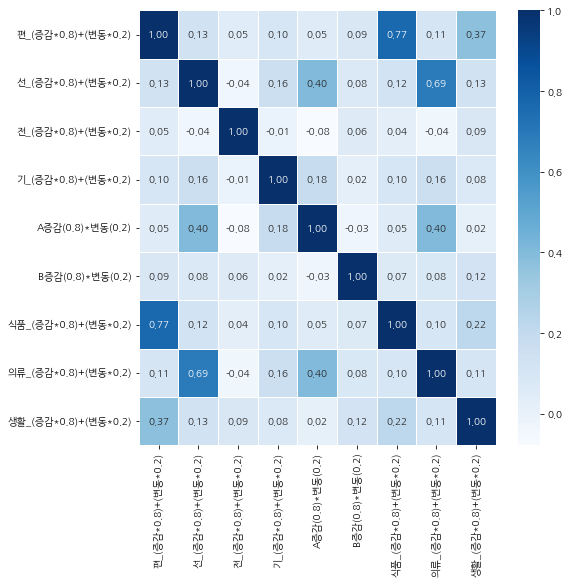

In [92]:
df_all1 = df_all[['편_(증감*0.8)+(변동*0.2)','선_(증감*0.8)+(변동*0.2)','전_(증감*0.8)+(변동*0.2)','기_(증감*0.8)+(변동*0.2)','A증감(0.8)*변동(0.2)','B증감(0.8)*변동(0.2)','식품_(증감*0.8)+(변동*0.2)','의류_(증감*0.8)+(변동*0.2)','생활_(증감*0.8)+(변동*0.2)']]
df_all1 = df_all1.corr()
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
sns.heatmap(data = df_all1, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

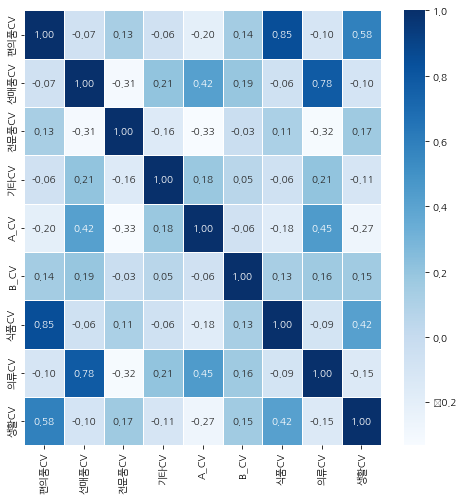

In [93]:
df_all2 = df_all[['편의품CV','선매품CV','전문품CV','기타CV','A_CV','B_CV','식품CV','의류CV','생활CV']]
df_all2 = df_all2.corr()
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
sns.heatmap(data = df_all2, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

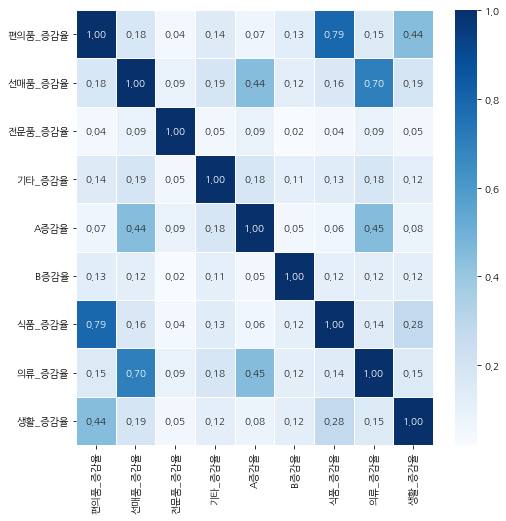

In [94]:
df_all3 = df_all[['편의품_증감율','선매품_증감율','전문품_증감율','기타_증감율','A증감율','B증감율','식품_증감율','의류_증감율','생활_증감율']]
df_all3 = df_all3.corr()
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
sns.heatmap(data = df_all3, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

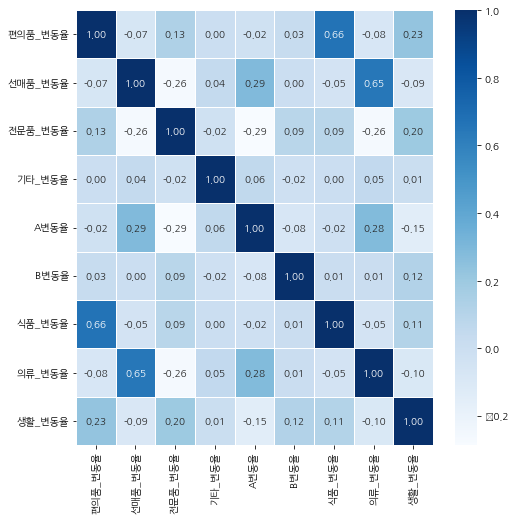

In [95]:
df_all4 = df_all[['편의품_변동율','선매품_변동율','전문품_변동율','기타_변동율','A변동율','B변동율','식품_변동율','의류_변동율','생활_변동율']]
df_all4 = df_all4.corr()
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
sns.heatmap(data = df_all4, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')